# Clustering on Real Life Dataset (Dartboard.csv)

In [2]:
import pandas as pd

# Load the dataset without modifying column names
data = pd.read_csv('dartboard2.csv', header=None)

# Display first few rows
print(data.head())


           0         1      2
0         a0        a1  class
1       -0.3       0.5      0
2  -0.300063  0.505026      0
3  -0.300253  0.510049      0
4  -0.300568  0.515065      0


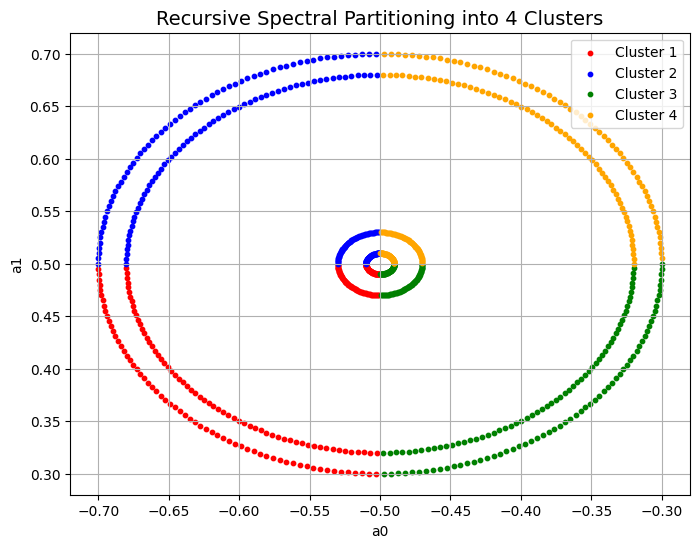

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.linalg import eigh

# Step 1: Load Dataset
data = pd.read_csv('dartboard2.csv')
X = data[['a0', 'a1']].values  # Extract feature columns

# Function to compute spectral partitioning
def spectral_partition(X, depth=0, max_depth=2):
    """ Recursively partitions data using spectral clustering. """
    if len(X) < 4 or depth >= max_depth:
        return [X]  # Base case: stop partitioning

    # Step 2: Construct Adjacency Matrix (Gaussian Kernel Similarity)
    sigma = 0.1  # Bandwidth for Gaussian similarity
    distance_matrix = cdist(X, X, metric='euclidean')  # Compute pairwise distances
    W = np.exp(-distance_matrix**2 / (2 * sigma**2))  # Adjacency matrix (similarity)

    # Step 3: Compute Degree Matrix (D) and Laplacian Matrix (D - A)
    D = np.diag(W.sum(axis=1))  # Degree matrix
    A = W  # Adjacency matrix
    L = D - A  # Compute Laplacian matrix (D - A)

    # Step 4: Compute Eigenvalues and Eigenvectors
    eigenvalues, eigenvectors = eigh(L)  # Solve Lx = λx
    fiedler_vector = eigenvectors[:, 1]  # Second smallest eigenvector

    # Step 5: Partition Data (Using Sign of Fiedler Vector)
    partition_mask = fiedler_vector > 0
    X1 = X[partition_mask]
    X2 = X[~partition_mask]
    return spectral_partition(X1, depth + 1, max_depth) + spectral_partition(X2, depth + 1, max_depth)

# Apply recursive spectral partitioning
clusters = spectral_partition(X, max_depth=2)  # 2 levels → 4 partitions

# Step 7: Visualization
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange']  # Assign different colors to clusters
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], s=10, label=f"Cluster {i+1}")

plt.title("Recursive Spectral Partitioning into 4 Clusters", fontsize=14)
plt.xlabel("a0")
plt.ylabel("a1")
plt.legend()
plt.grid(True)
plt.show()


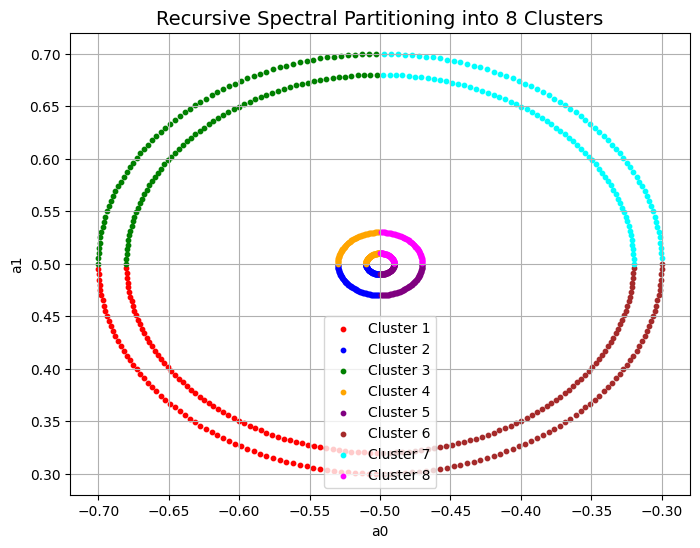

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.linalg import eigh

# Step 1: Load Dataset
data = pd.read_csv('dartboard2.csv')
X = data[['a0', 'a1']].values  # Extract feature columns

# Function to compute spectral partitioning
def spectral_partition(X, depth=0, max_depth=3):
    """ Recursively partitions data using spectral clustering. """
    if len(X) < 4 or depth >= max_depth:
        return [X]  # Base case: stop partitioning

    # Step 2: Construct Adjacency Matrix (Gaussian Kernel Similarity)
    sigma = 0.1  # Bandwidth for Gaussian similarity
    distance_matrix = cdist(X, X, metric='euclidean')  # Compute pairwise distances
    W = np.exp(-distance_matrix**2 / (2 * sigma**2))  # Adjacency matrix (similarity)

    # Step 3: Compute Degree Matrix (D) and Laplacian Matrix (D - A)
    D = np.diag(W.sum(axis=1))  # Degree matrix
    A = W  # Adjacency matrix
    L = D - A  # Laplacian matrix

    # Step 4: Compute Eigenvalues and Eigenvectors
    eigenvalues, eigenvectors = eigh(L)  # Solve Lx = λx
    fiedler_vector = eigenvectors[:, 1]  # Second smallest eigenvector

    # Step 5: Partition Data (Using Sign of Fiedler Vector)
    partition_mask = fiedler_vector > 0
    X1 = X[partition_mask]
    X2 = X[~partition_mask]

    # Recursive partitioning
    return spectral_partition(X1, depth + 1, max_depth) + spectral_partition(X2, depth + 1, max_depth)

# Apply recursive spectral partitioning
clusters = spectral_partition(X, max_depth=3)  # 3 levels → 8 clusters

# Step 7: Visualization
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta']
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i % len(colors)], s=10, label=f"Cluster {i+1}")

plt.title("Recursive Spectral Partitioning into 8 Clusters", fontsize=14)
plt.xlabel("a0")
plt.ylabel("a1")
plt.legend()
plt.grid(True)
plt.show()
